In [2]:
# exercise 1
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
data_set = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data_set.head())
data_set.dropna(inplace=True) # handle rows with missing values

encoder = OrdinalEncoder()
columns = data_set.select_dtypes(include=['object']).columns
print(columns)
data_set[columns] = encoder.fit_transform(data_set[columns]) # assigns a unique integer to each category

nr_col = data_set.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_set[nr_col] = scaler.fit_transform(data_set[nr_col]) 

print('processed data>')
print(data_set.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


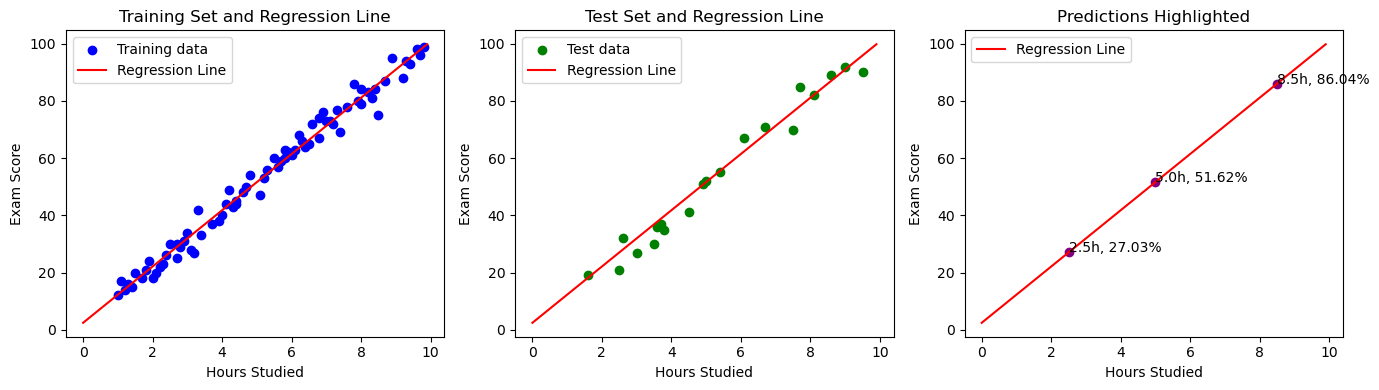

In [8]:
#exercise 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

score_df = pd.read_csv('archive/score_updated.csv')

X = score_df[['Hours']] # independent var.
y = score_df['Scores'] #dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# prepare for plotting
line_x = np.arange(0, 10, 0.1).reshape(-1, 1)
line_y = model.predict(line_x)

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(line_x, line_y, color='red', label='Regression Line')
plt.title('Training Set and Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(line_x, line_y, color='red', label='Regression Line')
plt.title('Test Set and Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()

# 3 specific predictions
hours_for_prediction = np.array([[2.5], [5.0], [8.5]])
predicted_scores = model.predict(hours_for_prediction)

plt.subplot(1, 3, 3)
plt.plot(line_x, line_y, color='red', label='Regression Line')
for hours, score in zip(hours_for_prediction, predicted_scores):
    plt.scatter(hours, score, color='purple')
    plt.text(hours, score, f'{hours[0]}h, {score:.2f}%', color='black')
plt.title('Predictions Highlighted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
#exercise 3:
zimport pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import numpy as np

score_df = pd.read_csv('archive/score_updated.csv')
X = score_df[['Hours']]
y = score_df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ridge regression:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression - Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression - Test set score: {ridge.score(X_test, y_test):.2f}")

#lasso regression:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

#elastic net:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")


Ridge Regression - Training set score: 0.98
Ridge Regression - Test set score: 0.97
Lasso Regression-Training set score: 0.98
Lasso Regression-Test set score: 0.97
Elastic Net-Training set score: 0.98
Elastic Net-Test set score: 0.97
